In [1]:
from src.cityscapes_dataset import CityscapesDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from src.depthnet import SegNet
import torch
from src.trainer import Trainer
from src.utils import visualize_results_singletask, count_params

2025-01-23 18:19:03.857303: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-23 18:19:03.897541: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-23 18:19:04.625545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
LABELS = 7
BATCH_SIZE = 8

Image: torch.Size([8, 3, 128, 256]), Label: torch.Size([8, 128, 256]), Depth: torch.Size([8, 128, 256])
Image: 1.0, 0.027450980392156862
Label: 6.0, -1.0
Depth: 0.4922102689743042, 0.0


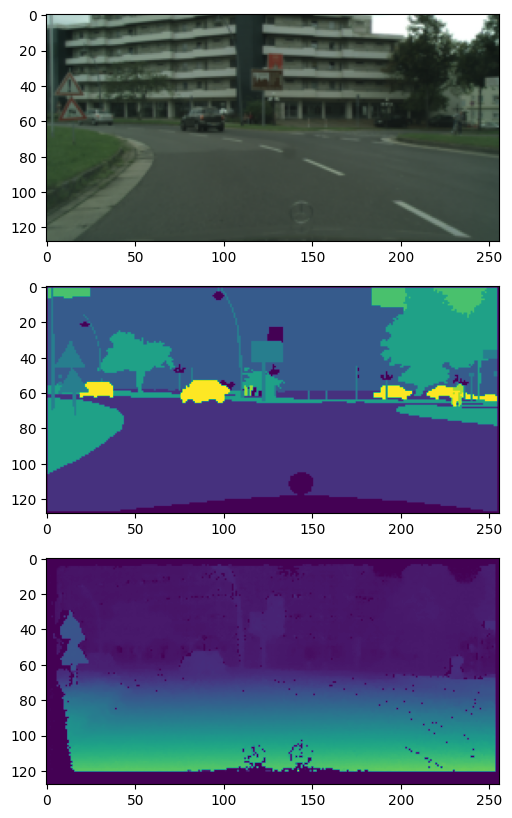

In [3]:
cityscapes_train = CityscapesDataset(split="train",labels=LABELS)
train_dl = DataLoader(cityscapes_train, batch_size=BATCH_SIZE, shuffle=False)
for image, label, depth in train_dl:
    print(f'Image: {image.shape}, Label: {label.shape}, Depth: {depth.shape}')
    print(f'Image: {image.max()}, {image.min()}') 
    print(f'Label: {label.max()}, {label.min()}')
    print(f'Depth: {depth.max()}, {depth.min()}')
    break
ax, fig = plt.subplots(3, figsize=(10, 10))
fig[0].imshow(image[0].permute(1, 2, 0))
fig[1].imshow(label[0])
fig[2].imshow(depth[0])
plt.show()

cityscapes_val = CityscapesDataset(split="val", labels=LABELS)
val_dl = DataLoader(cityscapes_val, batch_size=BATCH_SIZE, shuffle=False)

segnet has 43341640 parameters


100%|██████████| 372/372 [01:13<00:00,  5.06it/s]


Epoch 0/10 - Train Loss: 1.4831
miou: 0.13385365903377533
pix_acc: 0.540466845035553
Gradient Norm: 1.9490885992706104



100%|██████████| 63/63 [00:04<00:00, 13.28it/s]


Test Loss:  0.8240828608709668
miou: 0.2160523682832718
pix_acc: 0.7058905959129333




100%|██████████| 372/372 [01:15<00:00,  4.96it/s]


Epoch 5/10 - Train Loss: 0.4700
miou: 0.3640195429325104
pix_acc: 0.8448294401168823
Gradient Norm: 0.9588910211448394



100%|██████████| 63/63 [00:03<00:00, 16.62it/s]


Test Loss:  0.6024341952233088
miou: 0.2955580949783325
pix_acc: 0.7983893752098083




100%|██████████| 372/372 [01:16<00:00,  4.88it/s]


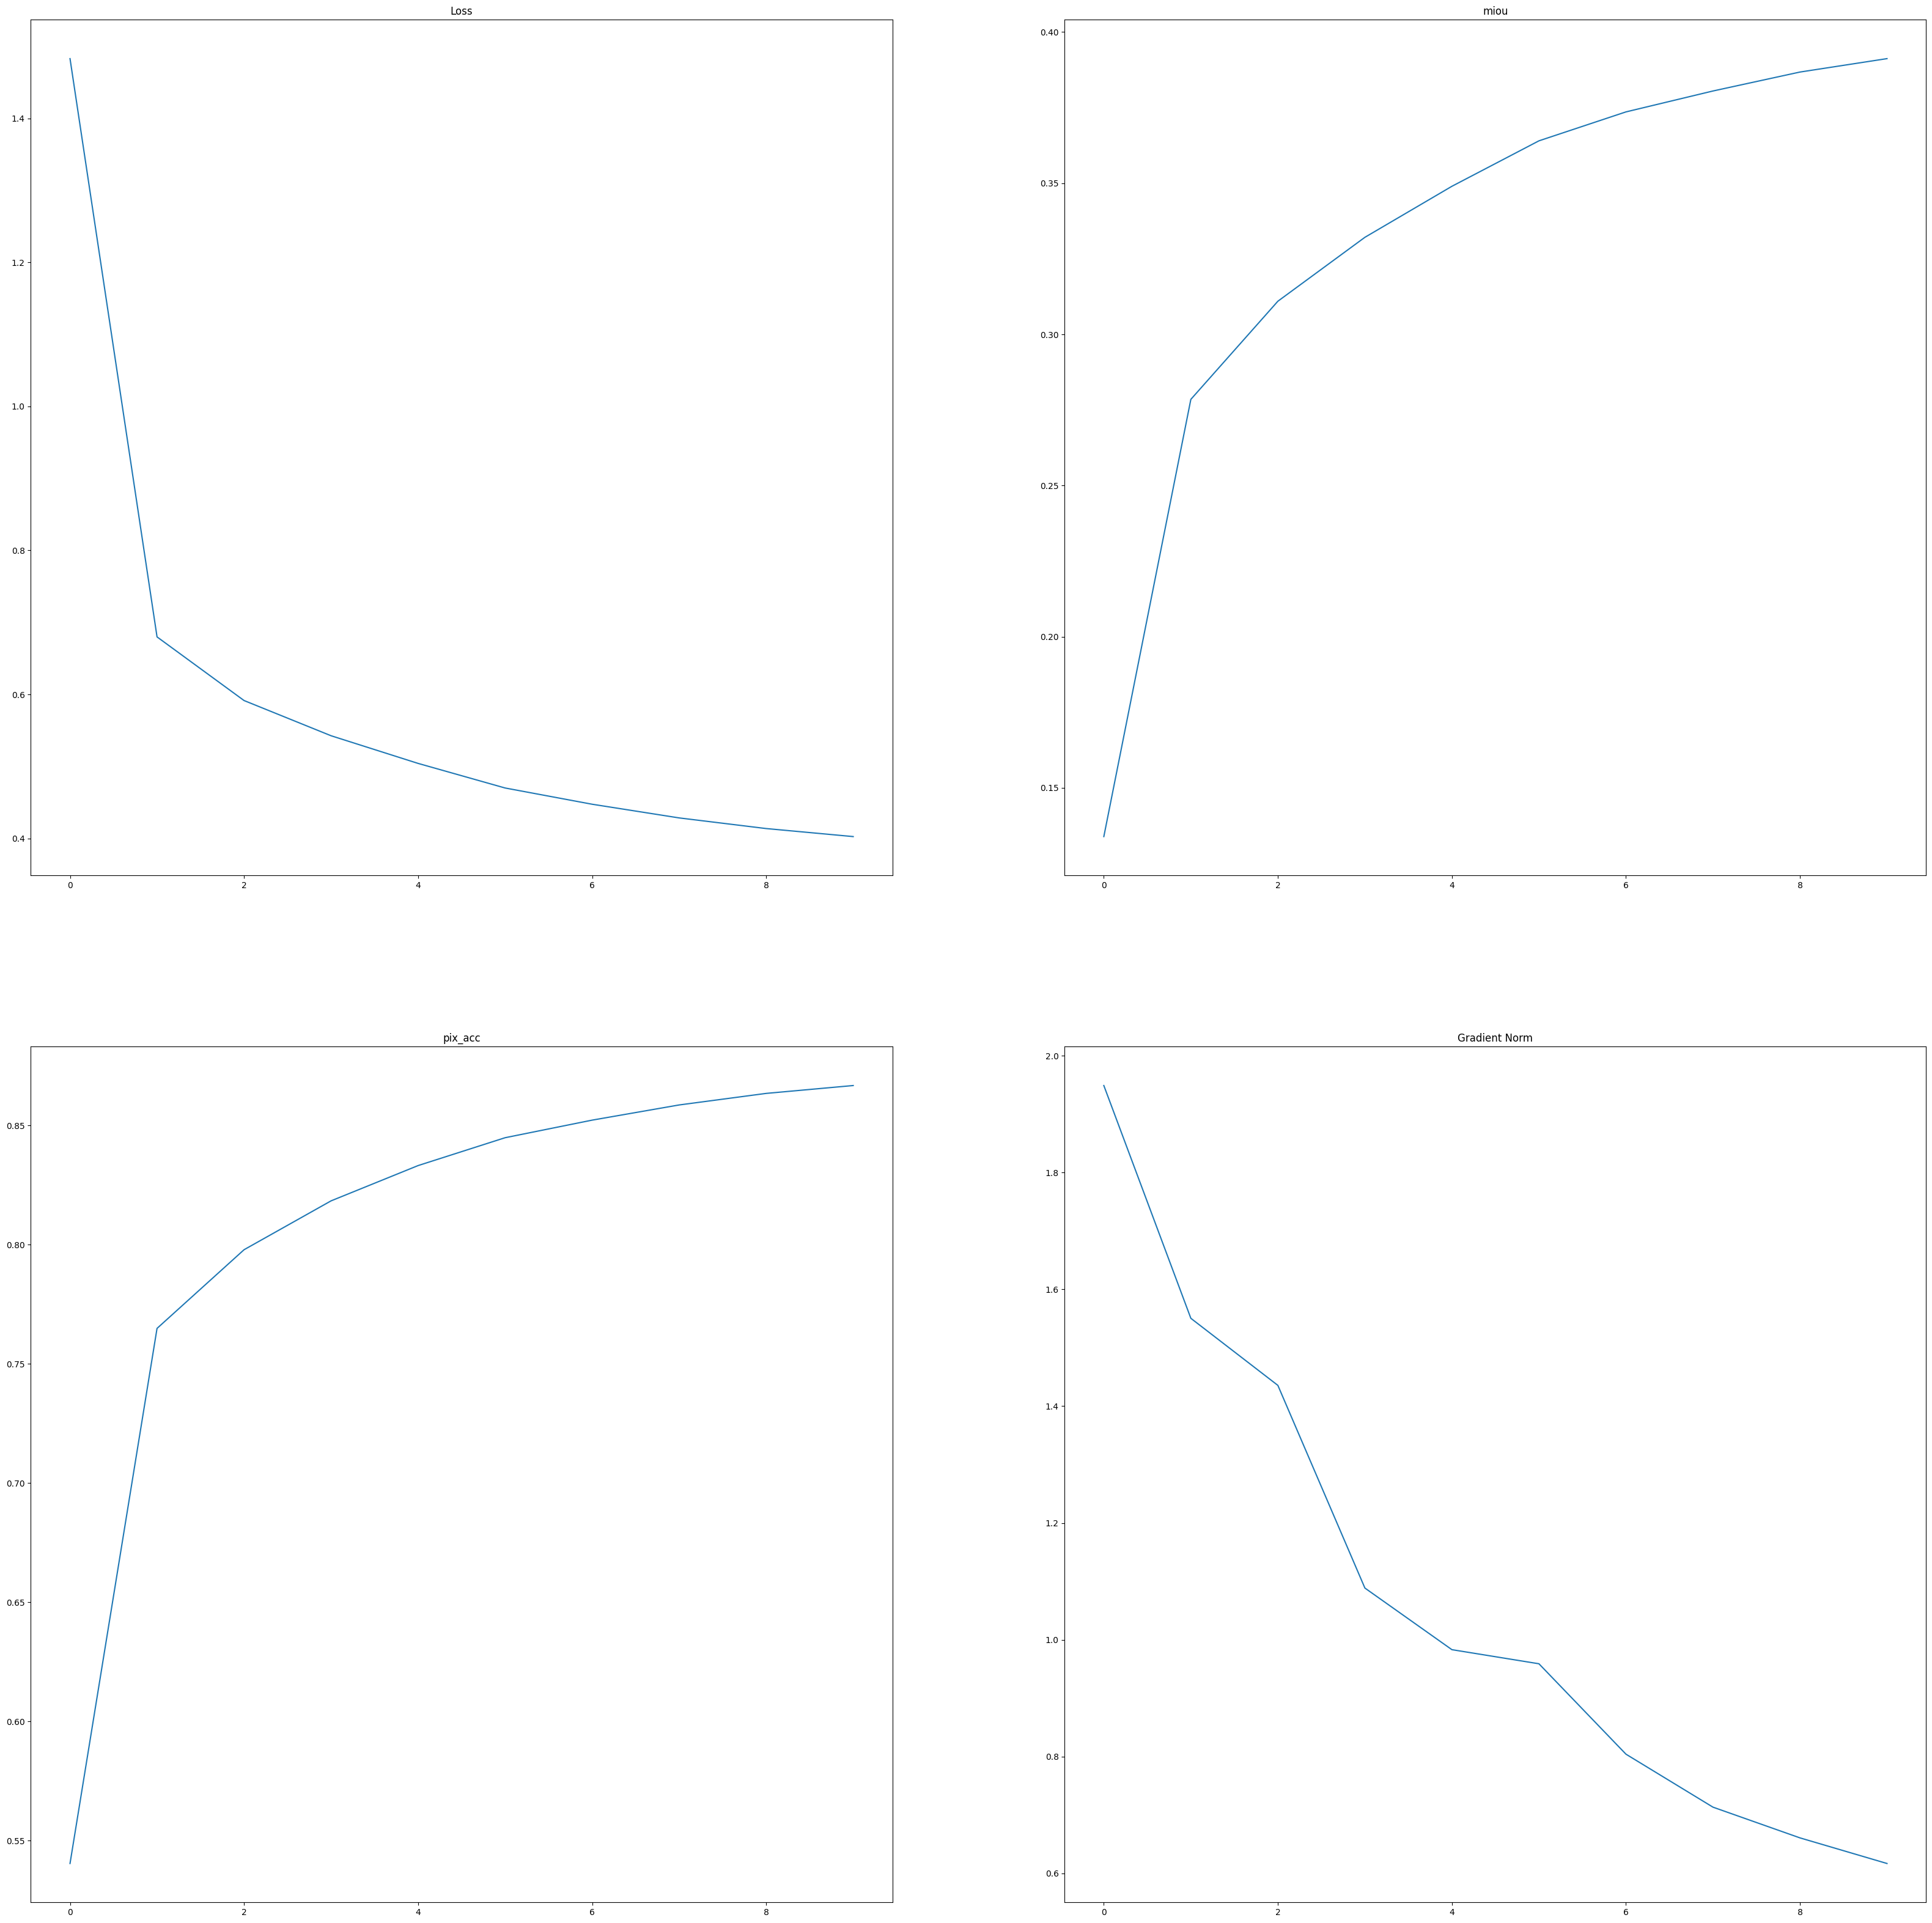

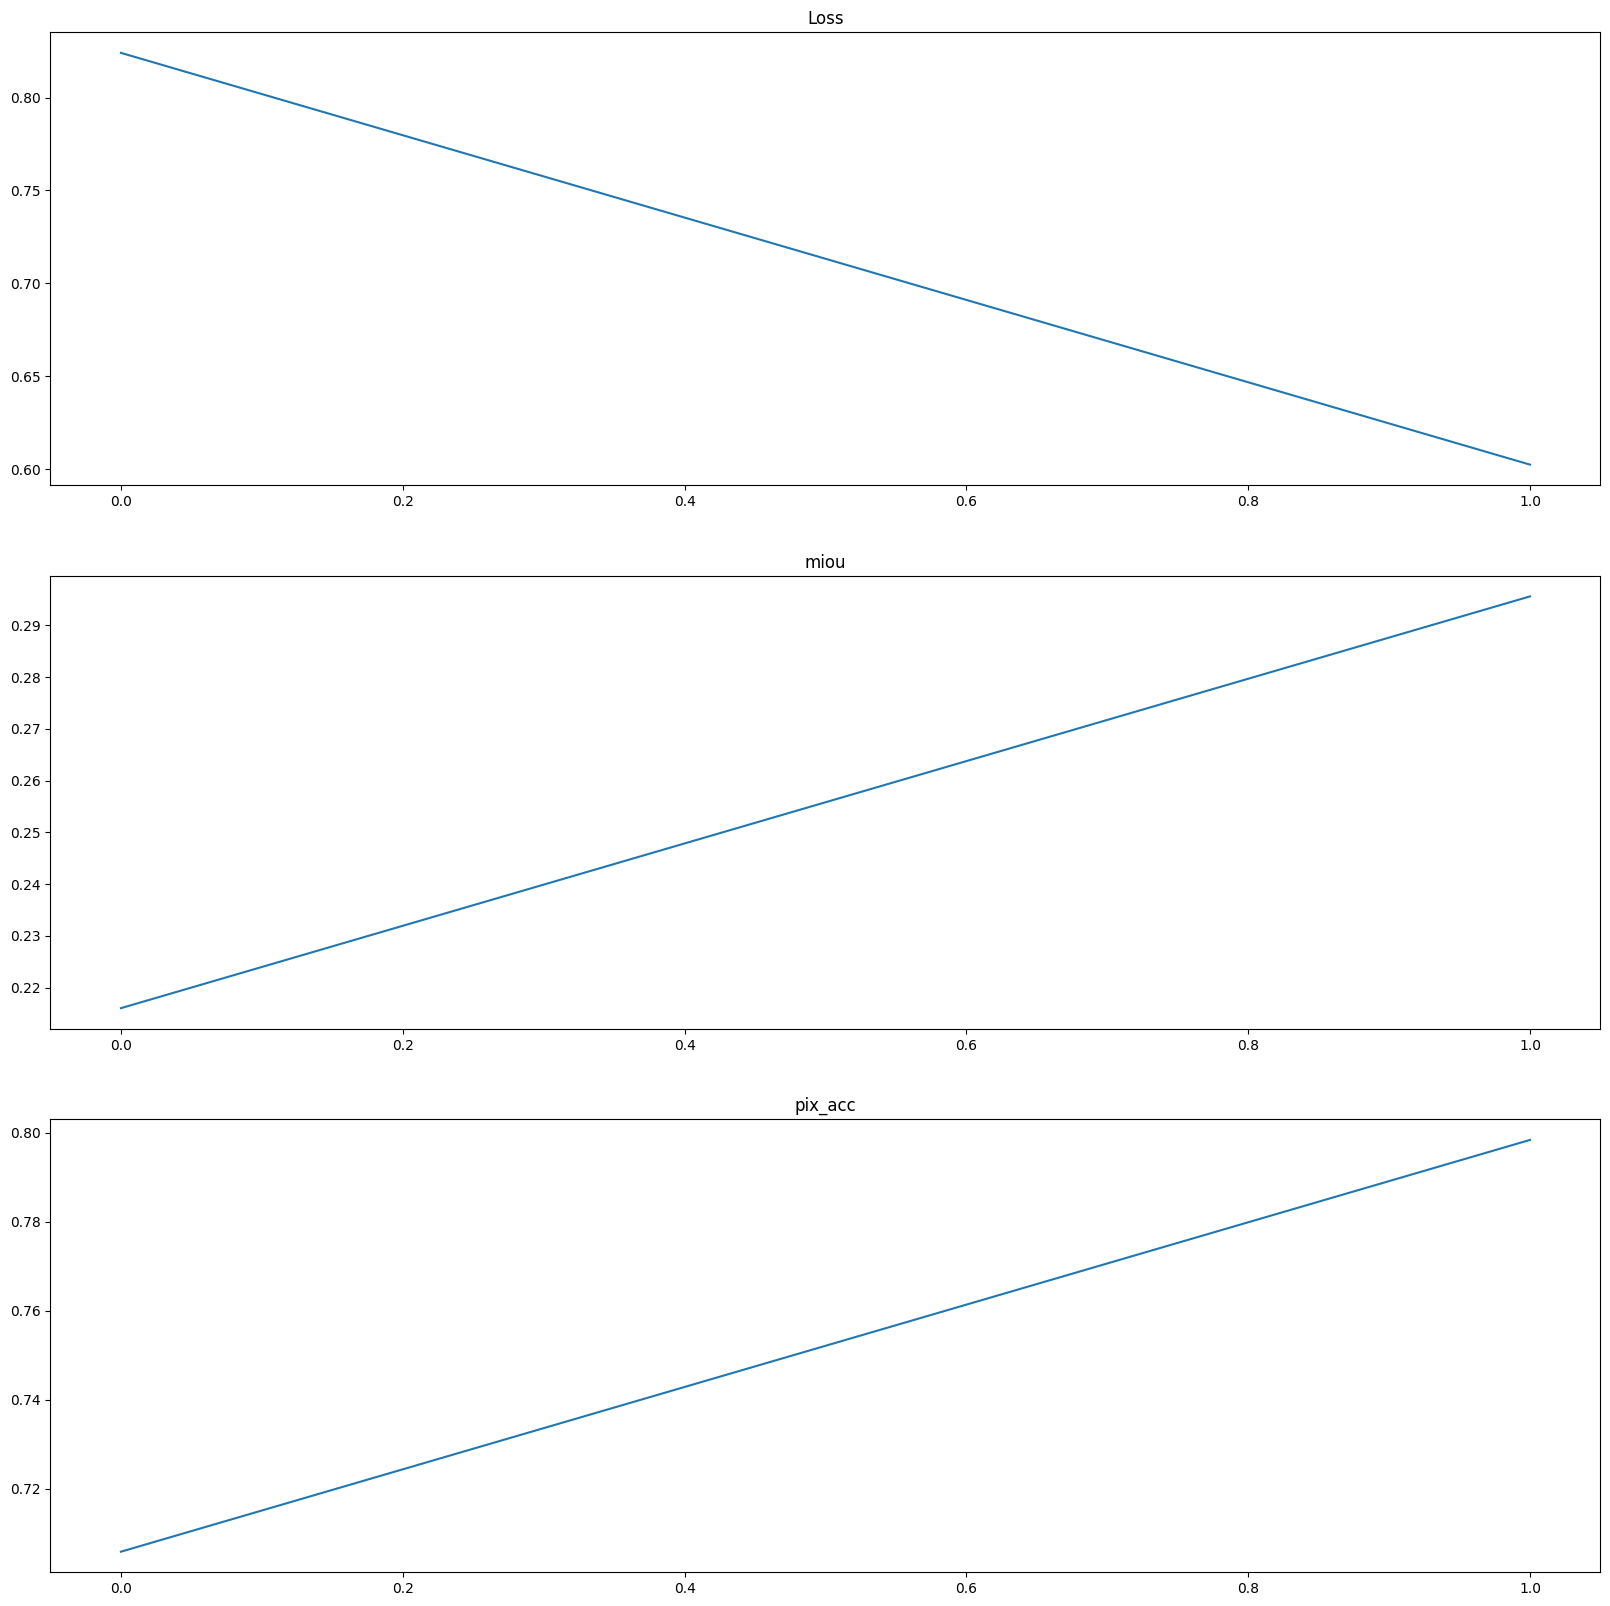

In [4]:
model = SegNet()
print(f"{model.name} has {count_params(model)} parameters")
opt = torch.optim.Adam(model.parameters(), lr=1e-4)
trainer = Trainer(model, opt)
trainer.train(train_dl, val_dl, epochs=10, save=True)

In [ ]:
tests = 10
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = SegNet()
model.load_state_dict(torch.load("./models/depthnet/depthnet_train10.pth", weights_only=True))
for i, (img, _, img_depth) in enumerate(val_dl):
    visualize_results_singletask(model, img[0], img_depth[0], device)
    if i == tests:
        break